In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  1 18:43:52 2020

@author: joaop
"""

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
import numba
from numba import njit
import warnings
from epidemic_model_classes import *
from scipy.integrate import solve_ivp

# Deactivate numba deprecation warnings
warnings.simplefilter('ignore', category=numba.NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=numba.NumbaPendingDeprecationWarning)

In [3]:
t = np.linspace(1, 200, 200) # Days
n = 1000 # Repetitions

functions = [SIRD, SEIRD, SEIHRD, SEIARD] # Models

t_rk = np.zeros(len(functions)) # Time array for rk4
t_sivp_rk = np.zeros(len(functions)) # Time array for solve_ivp(RK45)
t_sivp_ls = np.zeros(len(functions)) # Time array for solve_ivp(LSODA)

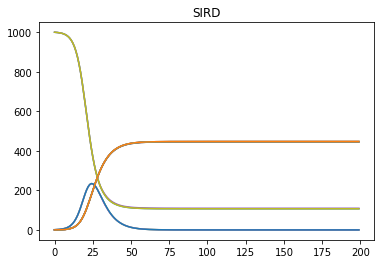


##################################################################

SIRD 

rk4 - solve_ivp(RK45) distance: 936.0098
rk4 - solve_ivp(LSODA) distance: 8.2085
solve_ivp(LSODA) - solve_ivp(RK45) distance: 935.3987

rk4: 0.0004 s
solve_ivp RK45: 0.0074 s
solve_ivp LSODA: 0.0080 s


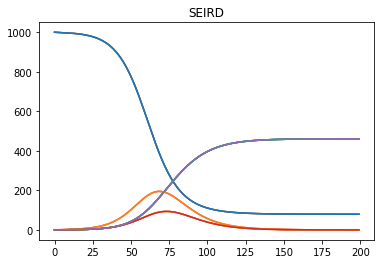


##################################################################

SEIRD 

rk4 - solve_ivp(RK45) distance: 13.4316
rk4 - solve_ivp(LSODA) distance: 26.4327
solve_ivp(LSODA) - solve_ivp(RK45) distance: 26.0336

rk4: 0.0003 s
solve_ivp RK45: 0.0068 s
solve_ivp LSODA: 0.0090 s


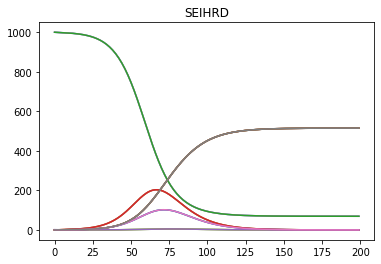


##################################################################

SEIHRD 

rk4 - solve_ivp(RK45) distance: 11.4011
rk4 - solve_ivp(LSODA) distance: 48.3669
solve_ivp(LSODA) - solve_ivp(RK45) distance: 46.3574

rk4: 0.0003 s
solve_ivp RK45: 0.0072 s
solve_ivp LSODA: 0.0081 s


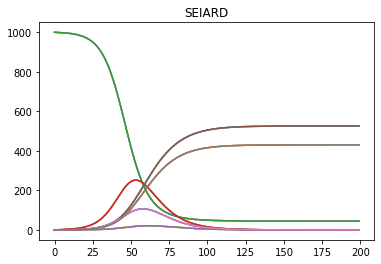


##################################################################

SEIARD 

rk4 - solve_ivp(RK45) distance: 18.5001
rk4 - solve_ivp(LSODA) distance: 17.4302
solve_ivp(LSODA) - solve_ivp(RK45) distance: 25.1771

rk4: 0.0003 s
solve_ivp RK45: 0.0068 s
solve_ivp LSODA: 0.0080 s


In [4]:
c = 0 # Counting functions

for func in functions:
    
    # Generate initial conditions
    y0 = np.zeros(func.ncomp)
    y0[0] = 1000
    y0[-2] = 1
    
    # Generate parameters
    p = np.ones(func.nparams)/10
    p[0] = 0.5
    for i in range(len(func.params)):
        if func.params[i] == r"$N$":
            p[i] = 1000
        if func.params[i] == r"\tau_{h}":
            p[i] = 10
        if func.params[i] == r"\tau_{t}":
            p[i] = 20
    
    # Calculate and plot solutions for diffrent methods
    rk = rk4(func.model, y0, t, p, h=1.)
    sivp_rk = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="RK45", args=[p])
    sivp_ls = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="LSODA", args=[p])
    
    plt.plot(rk)
    plt.plot(sivp_rk.y.T)
    plt.plot(sivp_ls.y.T)
    plt.title(func.name)
    plt.show()
    
    # Print distance between results of different methods
    print("\n##################################################################\n")
    print(func.name, "\n")
    print("rk4 - solve_ivp(RK45) distance: %.4f" % np.sum(np.abs(rk-sivp_rk.y.T)))
    print("rk4 - solve_ivp(LSODA) distance: %.4f" % np.sum(np.abs(rk-sivp_ls.y.T)))
    print("solve_ivp(LSODA) - solve_ivp(RK45) distance: %.4f\n" % np.sum(np.abs(sivp_ls.y.T-sivp_rk.y.T)))
    
    # Calculate execution time
    t_rk[c] = time.time()
    for i in range(n):
        rk = rk4(func.model, y0, t, p, h=1.)
    t_rk[c] = time.time()-t_rk[c]
    
    t_sivp_rk[c] = time.time()
    for i in range(n):
        sivp_rk = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="RK45", args=[p])
    t_sivp_rk[c] = time.time()-t_sivp_rk[c]
    
    t_sivp_ls[c] = time.time()
    for i in range(n):
        sivp_ls = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="LSODA", args=[p])
    t_sivp_ls[c] = time.time()-t_sivp_ls[c]
    
    # Print execution time results
    print("rk4: %.4f s" % (t_rk[c]/n))
    print("solve_ivp RK45: %.4f s" % (t_sivp_rk[c]/n))
    print("solve_ivp LSODA: %.4f s" % (t_sivp_ls[c]/n))
    
    c += 1

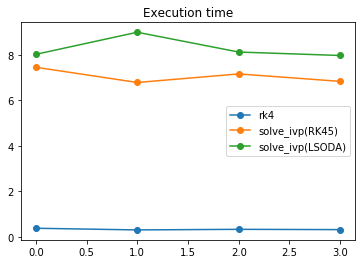

In [5]:
plt.plot(t_rk, linestyle="-", marker="o", label="rk4")
plt.plot(t_sivp_rk, linestyle="-", marker="o", label="solve_ivp(RK45)")
plt.plot(t_sivp_ls, linestyle="-", marker="o", label="solve_ivp(LSODA)")
plt.legend()
plt.title("Execution time")
plt.show()

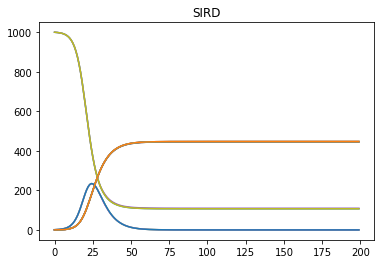


##################################################################

SIRD 

rk4 - solve_ivp(RK45) distance: 936.0098
rk4 - solve_ivp(LSODA) distance: 8.2085
solve_ivp(LSODA) - solve_ivp(RK45) distance: 935.3987

rk4: 0.0003 s
solve_ivp RK45: 0.0075 s
solve_ivp LSODA: 0.0084 s


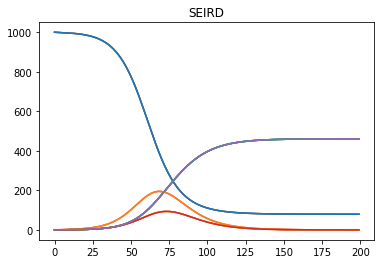


##################################################################

SEIRD 

rk4 - solve_ivp(RK45) distance: 13.4316
rk4 - solve_ivp(LSODA) distance: 26.4327
solve_ivp(LSODA) - solve_ivp(RK45) distance: 26.0336

rk4: 0.0003 s
solve_ivp RK45: 0.0069 s
solve_ivp LSODA: 0.0082 s


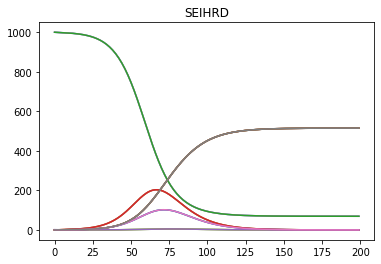


##################################################################

SEIHRD 

rk4 - solve_ivp(RK45) distance: 11.4011
rk4 - solve_ivp(LSODA) distance: 48.3669
solve_ivp(LSODA) - solve_ivp(RK45) distance: 46.3574

rk4: 0.0003 s
solve_ivp RK45: 0.0070 s
solve_ivp LSODA: 0.0081 s


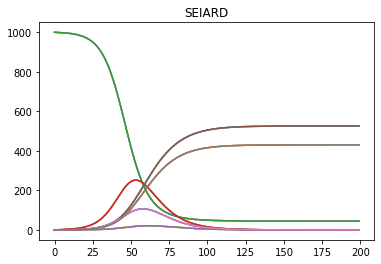


##################################################################

SEIARD 

rk4 - solve_ivp(RK45) distance: 18.5001
rk4 - solve_ivp(LSODA) distance: 17.4302
solve_ivp(LSODA) - solve_ivp(RK45) distance: 25.1771

rk4: 0.0003 s
solve_ivp RK45: 0.0066 s
solve_ivp LSODA: 0.0079 s


In [6]:
# Repeating for a smaller time step in rk4

c = 0 # Counting functions

for func in functions:
    
    # Generate initial conditions
    y0 = np.zeros(func.ncomp)
    y0[0] = 1000
    y0[-2] = 1
    
    # Generate parameters
    p = np.ones(func.nparams)/10
    p[0] = 0.5
    for i in range(len(func.params)):
        if func.params[i] == r"$N$":
            p[i] = 1000
        if func.params[i] == r"\tau_{h}":
            p[i] = 10
        if func.params[i] == r"\tau_{t}":
            p[i] = 20
    
    # Calculate and plot solutions for diffrent methods
    rk = rk4(func.model, y0, t, p, h=1.)
    sivp_rk = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="RK45", args=[p])
    sivp_ls = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="LSODA", args=[p])
    
    plt.plot(rk)
    plt.plot(sivp_rk.y.T)
    plt.plot(sivp_ls.y.T)
    plt.title(func.name)
    plt.show()
    
    # Print distance between results of different methods
    print("\n##################################################################\n")
    print(func.name, "\n")
    print("rk4 - solve_ivp(RK45) distance: %.4f" % np.sum(np.abs(rk-sivp_rk.y.T)))
    print("rk4 - solve_ivp(LSODA) distance: %.4f" % np.sum(np.abs(rk-sivp_ls.y.T)))
    print("solve_ivp(LSODA) - solve_ivp(RK45) distance: %.4f\n" % np.sum(np.abs(sivp_ls.y.T-sivp_rk.y.T)))
    
    # Calculate execution time
    t_rk[c] = time.time()
    for i in range(n):
        rk = rk4(func.model, y0, t, p, h=1.)
    t_rk[c] = time.time()-t_rk[c]
    
    t_sivp_rk[c] = time.time()
    for i in range(n):
        sivp_rk = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="RK45", args=[p])
    t_sivp_rk[c] = time.time()-t_sivp_rk[c]
    
    t_sivp_ls[c] = time.time()
    for i in range(n):
        sivp_ls = solve_ivp(func.model, [t[0], t[-1]], y0, t_eval=t, method="LSODA", args=[p])
    t_sivp_ls[c] = time.time()-t_sivp_ls[c]
    
    # Print execution time results
    print("rk4: %.4f s" % (t_rk[c]/n))
    print("solve_ivp RK45: %.4f s" % (t_sivp_rk[c]/n))
    print("solve_ivp LSODA: %.4f s" % (t_sivp_ls[c]/n))
    
    c += 1

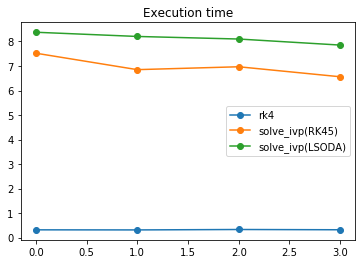

In [7]:
plt.plot(t_rk, linestyle="-", marker="o", label="rk4")
plt.plot(t_sivp_rk, linestyle="-", marker="o", label="solve_ivp(RK45)")
plt.plot(t_sivp_ls, linestyle="-", marker="o", label="solve_ivp(LSODA)")
plt.legend()
plt.title("Execution time")
plt.show()

In [8]:
# Benchmark comparing to a damped harmonic oscillator's analytic solution

# ODE system definition
@njit
def f(t, x, p):
    
    return np.array([x[1], -p[0]**2*x[0]-p[1]*x[1]])

t = np.linspace(0, 10, 10000) # Time array

y0 = np.array([1.,0.]) # Initial conditions
p = np.array([3., 0.5]) # parameters (frequency and dissipation const.)

In [9]:
# Numerical solutions
rk_sol = rk4(f, y0, t, p, 1e-2)
sivp_sol_rk = solve_ivp(f, [t[0], t[-1]], y0, t_eval=t, args=[p])
sivp_sol_ls = solve_ivp(f, [t[0], t[-1]], y0, t_eval=t, args=[p], method="LSODA")

# Analytic solution
w1 = np.sqrt(p[0]**2-p[1]**2/4)

x1 = np.exp(-p[1]*t/2)*(np.cos(w1*t) + p[1]/2/w1*np.sin(w1*t))
x2 = -p[1]/2*x1 + np.exp(-p[1]*t/2)*(p[1]/2*np.cos(w1*t)-w1*np.sin(w1*t))

anal_sol = np.concatenate((x1, x2)).reshape((2,len(t))).T

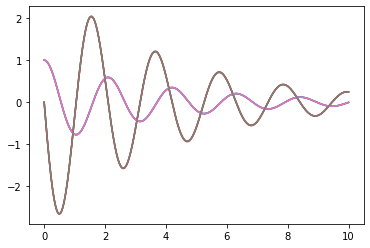

In [11]:
# Plotting, we see all results overlap
plt.plot(t, rk_sol)
plt.plot(t, sivp_sol_rk.y.T)
plt.plot(t, sivp_sol_ls.y.T)
plt.plot(t, anal_sol)

In [12]:
# Print distances between analytic and numerical results
print("rk4 - analytic_sol distance:", np.sum((rk_sol-anal_sol)**2))
print("solve_ivp(RK45) - analytic_sol distance:", np.sum((sivp_sol_rk.y.T-anal_sol)**2))
print("solve_ivp(LSODA) - analytic_sol distance:", np.sum((sivp_sol_ls.y.T-anal_sol)**2))
print("\nrk4 - solve_ivp(RK45) distance:", np.sum((rk_sol-sivp_sol_rk.y.T)**2))
print("rk4 - solve_ivp(LSODA) distance:", np.sum((rk_sol-sivp_sol_ls.y.T)**2))
print("solve_ivp(RK45) - solve_ivp(LSODA) distance:", np.sum((sivp_sol_rk.y.T-sivp_sol_ls.y.T)**2))

rk4 - analytic_sol distance: 9.510046553442036e-05
solve_ivp(RK45) - analytic_sol distance: 0.032811771985478175
solve_ivp(LSODA) - analytic_sol distance: 0.2981706553841482

rk4 - solve_ivp(RK45) distance: 0.0322776221219472
rk4 - solve_ivp(LSODA) distance: 0.3043522196706943
solve_ivp(RK45) - solve_ivp(LSODA) distance: 0.38445435245423004
